## Alumnos:
### Basile Álvarez Andrés José
### Keller Ascencio Rodolfo Andrés

  Reseñas de Películas: Clasificación utilizando Naive Bayes, Árbol de decisión, SVM, con Bag-Of-Words y TF-IDF:
  - Incluyendo stopwords
  - Eliminando stopwords
  - Utilizando Stemming y eliminando stopwords
  - Utilizando lematización y eliminando stopwords.

Obtener para cada modelo accuracy, precision, recall, f1-score y matriz de confusión.

# Tratamiento de la información

#Importar datos, limpiarlos y generar dataframe.

La salida de ejecutar este código es un dataframe: *df_movies*.

Nota: únicamente contiene los datos de entrenamiento del dataset (es decir, los que estaban en la carpeta "train")...Y sobre esos se hará la partición de entrenamiento y prueba, ya que ocupando todos los datos (o sea, añadiendo los de la carpeta "test") el tiempo de ejecución es demasiado alto (o marca errores)

In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  32.8M      0  0:00:02  0:00:02 --:--:-- 32.8M


In [44]:
!rm -r aclImdb/train/unsup
!rm -r aclImdb/train/*.txt
!rm -r aclImdb/test/*.txt

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import os
import pandas as pd
import numpy as np
import time
import string

In [2]:
pathtrainpos = "aclImdb/train/pos"

lista_df = []

def read_text_file(file_path):
    with open(file_path,"r",errors="ignore") as f:
        data = f.readlines()
        df = pd.DataFrame(data, columns=['Informacion'])
        lista_df.append(df)

for file in os.listdir(pathtrainpos):
    #print(file)
    file_path = f"{pathtrainpos}/{file}"
    read_text_file(file_path)


# Concatenar los DataFrames en uno solo
df_trainpos = pd.concat(lista_df)

# Mostrar el DataFrame final
df_trainpos['Clasification'] = 1
print(df_trainpos)

                                          Informacion  Clasification
0   Bromwell High is a cartoon comedy. It ran at t...              1
0   Homelessness (or Houselessness as George Carli...              1
0   Brilliant over-acting by Lesley Ann Warren. Be...              1
0   This is easily the most underrated film inn th...              1
0   This is not the typical Mel Brooks film. It wa...              1
..                                                ...            ...
0   Seeing as the vote average was pretty low, and...              1
0   The plot had some wretched, unbelievable twist...              1
0   I am amazed at how this movie(and most others ...              1
0   A Christmas Together actually came before my t...              1
0   Working-class romantic drama from director Mar...              1

[12500 rows x 2 columns]


In [3]:
pathtrainneg = "aclImdb/train/neg"

lista_df = []

def read_text_file(file_path):
    with open(file_path,"r",errors="ignore") as f:
        data = f.readlines()
        df = pd.DataFrame(data, columns=['Informacion'])
        lista_df.append(df)

for file in os.listdir(pathtrainneg):
    #print(file)
    file_path = f"{pathtrainneg}/{file}"
    read_text_file(file_path)


# Concatenar los DataFrames en uno solo
df_trainneg = pd.concat(lista_df)

# Mostrar el DataFrame final
df_trainneg['Clasification'] = 0
print(df_trainneg)

                                          Informacion  Clasification
0   Story of a man who has unnatural feelings for ...              0
0   Airport '77 starts as a brand new luxury 747 p...              0
0   This film lacked something I couldn't put my f...              0
0   Sorry everyone,,, I know this is supposed to b...              0
0   When I was little my parents took me along to ...              0
..                                                ...            ...
0   Towards the end of the movie, I felt it was to...              0
0   This is the kind of movie that my enemies cont...              0
0   I saw 'Descent' last night at the Stockholm Fi...              0
0   Some films that you pick up for a pound turn o...              0
0   This is one of the dumbest films, I've ever se...              0

[12500 rows x 2 columns]


In [4]:
pathtestpos = "aclImdb/test/pos"

lista_df = []

def read_text_file(file_path):
    with open(file_path,"r",errors="ignore") as f:
        data = f.readlines()
        df = pd.DataFrame(data, columns=['Informacion'])
        lista_df.append(df)

for file in os.listdir(pathtestpos):
    #print(file)
    file_path = f"{pathtestpos}/{file}"
    read_text_file(file_path)


# Concatenar los DataFrames en uno solo
df_testpos = pd.concat(lista_df)

# Mostrar el DataFrame final
df_testpos['Clasification'] = 1
print(df_testpos)

                                          Informacion  Clasification
0   I went and saw this movie last night after bei...              1
0   Actor turned director Bill Paxton follows up h...              1
0   As a recreational golfer with some knowledge o...              1
0   I saw this film in a sneak preview, and it is ...              1
0   Bill Paxton has taken the true story of the 19...              1
..                                                ...            ...
0   I was extraordinarily impressed by this film. ...              1
0   Although I'm not a golf fan, I attended a snea...              1
0   From the start of "The Edge Of Love", the view...              1
0   This movie, with all its complexity and subtle...              1
0   I've seen this story before but my kids haven'...              1

[12500 rows x 2 columns]


In [5]:
pathtestneg = "aclImdb/test/neg"

lista_df = []

def read_text_file(file_path):
    with open(file_path,"r",errors="ignore") as f:
        data = f.readlines()
        df = pd.DataFrame(data, columns=['Informacion'])
        lista_df.append(df)

for file in os.listdir(pathtestneg):
    file_path = f"{pathtestneg}/{file}"
    read_text_file(file_path)


df_testneg = pd.concat(lista_df)

df_testneg['Clasification'] = 0
print(df_testneg)

                                          Informacion  Clasification
0   Once again Mr. Costner has dragged out a movie...              0
0   This is an example of why the majority of acti...              0
0   First of all I hate those moronic rappers, who...              0
0   Not even the Beatles could write songs everyon...              0
0   Brass pictures (movies is not a fitting word f...              0
..                                                ...            ...
0   I occasionally let my kids watch this garbage ...              0
0   When all we have anymore is pretty much realit...              0
0   The basic genre is a thriller intercut with an...              0
0   Four things intrigued me as to this film - fir...              0
0   David Bryce's comments nearby are exceptionall...              0

[12500 rows x 2 columns]


In [6]:
df_movies = []
df_movies = pd.concat([df_trainneg, df_trainpos])  # COMENTARIO -> Cuando se hace el split para bag of words, por ejemplo, se utiliza un único dataframe... en realidad podríamos usar nada más los datos de entrenamiento y sacar de ahí 25% para testing, porque sino quedan demasiados datos y me tarda mucho en ejecutar
#df_movies = pd.concat([df_trainneg,df_trainpos,df_testneg, df_testpos])
print(df_movies)

                                          Informacion  Clasification
0   Story of a man who has unnatural feelings for ...              0
0   Airport '77 starts as a brand new luxury 747 p...              0
0   This film lacked something I couldn't put my f...              0
0   Sorry everyone,,, I know this is supposed to b...              0
0   When I was little my parents took me along to ...              0
..                                                ...            ...
0   Seeing as the vote average was pretty low, and...              1
0   The plot had some wretched, unbelievable twist...              1
0   I am amazed at how this movie(and most others ...              1
0   A Christmas Together actually came before my t...              1
0   Working-class romantic drama from director Mar...              1

[25000 rows x 2 columns]


In [7]:
df_movies = df_movies[df_movies['Informacion'].str.strip() != '']
df_movies["clean_text"] = df_movies["Informacion"]
df_movies["clean_text"] = df_movies['clean_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
df_movies.head()

,Informacion,Clasification,clean_text
0,Story of a man who has unnatural feelings for ...,0,story of a man who has unnatural feelings for ...
0,Airport '77 starts as a brand new luxury 747 p...,0,airport 77 starts as a brand new luxury 747 pl...
0,This film lacked something I couldn't put my f...,0,this film lacked something i couldnt put my fi...
0,"Sorry everyone,,, I know this is supposed to b...",0,sorry everyone i know this is supposed to be a...
0,When I was little my parents took me along to ...,0,when i was little my parents took me along to ...


In [8]:
df_movies['clean_text'].value_counts()

when i got this movie free from my job along with three other similar movies i watched then with very low expectations now this movie isnt bad per se you get what you pay for it is a tale of love betrayal lies sex scandal everything you want in a movie definitely not a hollywood blockbuster but for cheap thrills it is not that bad i would probably never watch this movie again in a nutshell this is the kind of movie that you would see either very late at night on a local television station that is just wanting to take up some time or you would see it on a sunday afternoon on a local television station that is trying to take up some time despite the bad acting clichã© lines and sub par camera work i didnt have the desire to turn off the movie and pretend like it never popped into my dvd player the story has been done many times in many movies this one is no different no better no worse br br just your average movie                                                                          

# BOW + eliminando stopwords

In [9]:
from sklearn.feature_extraction.text import CountVectorizer #bolsa de palabras y pasamos las stop words. 

X = df_movies['clean_text'].values
y = df_movies['Clasification'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
vector = CountVectorizer(stop_words = 'english') #Stopwords

X_train_bow = vector.fit_transform(X_train)
X_test_bow = vector.transform(X_test)

In [10]:
X_train_bow.shape, X_test_bow.shape

((18750, 103293), (6250, 103293))

## Naives Bayes

In [11]:
start = time.time()
bayes_pred = MultinomialNB()
bayes_pred.fit(X_train_bow, y_train)
print("Tiempo de entrenamiento: ",time.time()-start)


start = time.time()
predictions = bayes_pred.predict(X_test_bow)
print("Tiempo de prediccción: ",time.time()-start)

Tiempo de entrenamiento:  0.06687569618225098
Tiempo de prediccción:  0.022843122482299805


In [12]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      3085
           1       0.87      0.84      0.85      3165

    accuracy                           0.85      6250
   macro avg       0.85      0.85      0.85      6250
weighted avg       0.86      0.85      0.85      6250



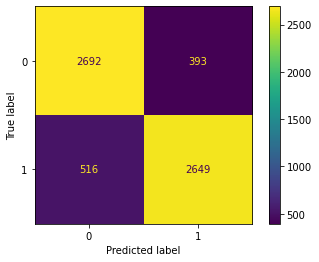

In [13]:
cm = confusion_matrix(y_test, predictions)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

## Árbol de decisión

In [14]:

start = time.time()
ClasificacionAD = DecisionTreeClassifier(criterion='gini',random_state=0)
ClasificacionAD.fit(X_train_bow, y_train)
print("Tiempo de entrenamiento: ", time.time()-start)

Tiempo de entrenamiento:  90.39029312133789


In [15]:
start = time.time()
Y_ClasificacionAD = ClasificacionAD.predict(X_test_bow)
print("Tiempo de predicción: ", time.time()-start)


Tiempo de predicción:  0.02958083152770996


In [16]:
print(Y_ClasificacionAD)
print(classification_report(y_test, Y_ClasificacionAD))

[1 0 0 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      3085
           1       0.72      0.72      0.72      3165

    accuracy                           0.72      6250
   macro avg       0.72      0.72      0.72      6250
weighted avg       0.72      0.72      0.72      6250



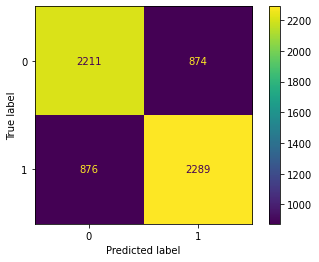

In [17]:
cm = confusion_matrix(y_test, Y_ClasificacionAD)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(Y_ClasificacionAD))
disp.plot()
plt.show()

## Máquina de soporte vectorial

In [18]:
start = time.time()
ModeloSVM_1 = SVC(kernel='linear')
ModeloSVM_1.fit(X_train_bow, y_train)
print("Tiempo de entrenamiento: ",time.time()-start)

Tiempo de entrenamiento:  761.6321992874146


In [19]:
start = time.time()
Clasificaciones_1 = ModeloSVM_1.predict(X_test_bow)
print("Tiempo de predicción: ",time.time()-start)
print(Clasificaciones_1)

#pd.DataFrame(Clasificaciones_1)

Clasificaciones = pd.DataFrame(y_test, Clasificaciones_1)
Clasificaciones

#Se calcula la exactitud promedio de la validación
ModeloSVM_1.score(X_test_bow, y_test)

#### **Validación del modelo**

#Matriz de clasificación
Clasificaciones_1 = ModeloSVM_1.predict(X_test_bow)
Matriz_Clasificacion = pd.crosstab(y_test.ravel(), 
                                   Clasificaciones_1, 
                                   rownames=['Real'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion


#Reporte de la clasificación
print("Exactitud", ModeloSVM_1.score(X_test_bow, y_test))
print(classification_report(y_test, Clasificaciones_1))

VectoresSoporte_1 = ModeloSVM_1.support_vectors_
pd.DataFrame(VectoresSoporte_1)

#Vectores de soporte
print('Número de vectores de soporte: \n', ModeloSVM_1.n_support_)
print('Vectores de soporte: \n', ModeloSVM_1.support_)


Tiempo de predicción:  32.550710678100586
[1 0 0 ... 0 1 1]
Exactitud 0.8608
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3085
           1       0.86      0.86      0.86      3165

    accuracy                           0.86      6250
   macro avg       0.86      0.86      0.86      6250
weighted avg       0.86      0.86      0.86      6250

Número de vectores de soporte: 
 [3350 3463]
Vectores de soporte: 
 [    1    16    21 ... 18742 18743 18749]


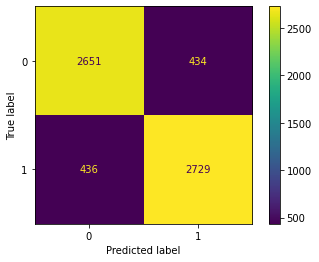

In [20]:
cm = confusion_matrix(y_test, Clasificaciones_1)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(Clasificaciones_1))
disp.plot()
plt.show()


# BOW + incluyendo stopwords



















In [21]:
from sklearn.feature_extraction.text import CountVectorizer #bolsa de palabras y pasamos las stop words. 

X = df_movies['clean_text'].values
y = df_movies['Clasification'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
vector = CountVectorizer() #Stopwords

X_train_bow = vector.fit_transform(X_train)
X_test_bow = vector.transform(X_test)

In [22]:
X_train_bow.shape, X_test_bow.shape

((18750, 103603), (6250, 103603))

## Naives Bayes

In [23]:
start = time.time()
bayes_pred = MultinomialNB()
bayes_pred.fit(X_train_bow, y_train)
print("Tiempo de entrenamiento: ",time.time()-start)


start = time.time()
predictions = bayes_pred.predict(X_test_bow)
print("Tiempo de prediccción: ",time.time()-start)

Tiempo de entrenamiento:  0.03400468826293945
Tiempo de prediccción:  0.009495019912719727


In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      3085
           1       0.87      0.82      0.84      3165

    accuracy                           0.85      6250
   macro avg       0.85      0.85      0.85      6250
weighted avg       0.85      0.85      0.85      6250



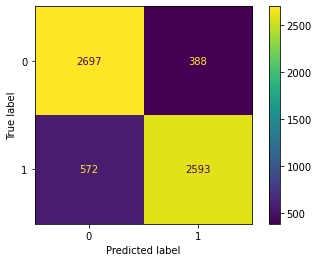

In [25]:
cm = confusion_matrix(y_test, predictions)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

## Árbol de decisión

In [26]:
start = time.time()
ClasificacionAD = DecisionTreeClassifier(criterion='gini',random_state=0)
ClasificacionAD.fit(X_train_bow, y_train)
print("Tiempo de entrenamiento: ", time.time()-start)

Tiempo de entrenamiento:  29.573174715042114


In [27]:
start = time.time()
Y_ClasificacionAD = ClasificacionAD.predict(X_test_bow)
print("Tiempo de predicción: ", time.time()-start)


Tiempo de predicción:  0.018465757369995117


In [28]:
print(Y_ClasificacionAD)
print(classification_report(y_test, Y_ClasificacionAD))

[0 1 0 ... 1 1 0]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      3085
           1       0.71      0.72      0.71      3165

    accuracy                           0.71      6250
   macro avg       0.71      0.71      0.71      6250
weighted avg       0.71      0.71      0.71      6250



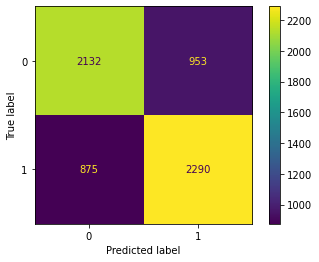

In [29]:
cm = confusion_matrix(y_test, Y_ClasificacionAD)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(Y_ClasificacionAD))
disp.plot()
plt.show()

## Máquina de soporte vectorial

In [30]:
start = time.time()
ModeloSVM_1 = SVC(kernel='linear')
ModeloSVM_1.fit(X_train_bow, y_train)
print("Tiempo de entrenamiento: ",time.time()-start)

Tiempo de entrenamiento:  894.7913243770599


In [31]:
start = time.time()
Clasificaciones_1 = ModeloSVM_1.predict(X_test_bow)
print("Tiempo de predicción: ",time.time()-start)
print(Clasificaciones_1)

#pd.DataFrame(Clasificaciones_1)

Clasificaciones = pd.DataFrame(y_test, Clasificaciones_1)
Clasificaciones

#Se calcula la exactitud promedio de la validación
ModeloSVM_1.score(X_test_bow, y_test)

#### **Validación del modelo**

#Matriz de clasificación
Clasificaciones_1 = ModeloSVM_1.predict(X_test_bow)
Matriz_Clasificacion = pd.crosstab(y_test.ravel(), 
                                   Clasificaciones_1, 
                                   rownames=['Real'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion


#Reporte de la clasificación
print("Exactitud", ModeloSVM_1.score(X_test_bow, y_test))
print(classification_report(y_test, Clasificaciones_1))

VectoresSoporte_1 = ModeloSVM_1.support_vectors_
pd.DataFrame(VectoresSoporte_1)

#Vectores de soporte
print('Número de vectores de soporte: \n', ModeloSVM_1.n_support_)
print('Vectores de soporte: \n', ModeloSVM_1.support_)


Tiempo de predicción:  58.589280128479004
[1 0 0 ... 0 1 1]
Exactitud 0.8632
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3085
           1       0.86      0.87      0.87      3165

    accuracy                           0.86      6250
   macro avg       0.86      0.86      0.86      6250
weighted avg       0.86      0.86      0.86      6250

Número de vectores de soporte: 
 [3214 3321]
Vectores de soporte: 
 [    1    21    25 ... 18742 18745 18749]


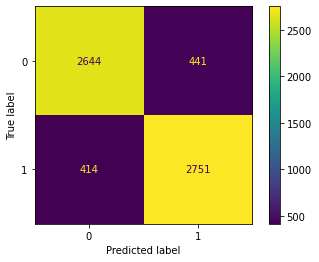

In [32]:
cm = confusion_matrix(y_test, Clasificaciones_1)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(Clasificaciones_1))
disp.plot()
plt.show()

# BOW + stemming + eliminando stopwords

In [33]:
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

ps = PorterStemmer ()


def stem_w(text):  #funcion obtenida de chatGPT
  words = nltk.word_tokenize(text)
  stemmed_words = [ps.stem(word) for word in words]
  return ' '.join(stemmed_words) 


df_movies['stemmed_clean_text'] = df_movies['clean_text'].apply(stem_w)
        

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rodol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
from sklearn.feature_extraction.text import CountVectorizer #bolsa de palabras y pasamos las stop words. 

X = df_movies['stemmed_clean_text'].values
y = df_movies['Clasification'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
vector = CountVectorizer(stop_words = 'english') #Stopwords

X_train_bow = vector.fit_transform(X_train)
X_test_bow = vector.transform(X_test)

In [35]:
X_train_bow.shape, X_test_bow.shape

((18750, 78270), (6250, 78270))

## Naives Bayes

In [36]:
start = time.time()
bayes_pred = MultinomialNB()
bayes_pred.fit(X_train_bow, y_train)
print("Tiempo de entrenamiento: ",time.time()-start)


start = time.time()
predictions = bayes_pred.predict(X_test_bow)
print("Tiempo de prediccción: ",time.time()-start)

Tiempo de entrenamiento:  0.03199291229248047
Tiempo de prediccción:  0.006984710693359375


In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      3085
           1       0.87      0.82      0.84      3165

    accuracy                           0.85      6250
   macro avg       0.85      0.85      0.85      6250
weighted avg       0.85      0.85      0.85      6250



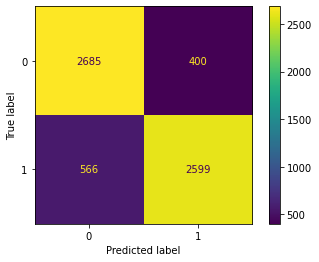

In [38]:
cm = confusion_matrix(y_test, predictions)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

## Árbol de decisión

In [39]:

start = time.time()
ClasificacionAD = DecisionTreeClassifier(criterion='gini',random_state=0)
ClasificacionAD.fit(X_train_bow, y_train)
print("Tiempo de entrenamiento: ", time.time()-start)

Tiempo de entrenamiento:  15.702741861343384


In [40]:
start = time.time()
Y_ClasificacionAD = ClasificacionAD.predict(X_test_bow)
print("Tiempo de predicción: ", time.time()-start)


Tiempo de predicción:  0.01851034164428711


In [41]:
print(Y_ClasificacionAD)
print(classification_report(y_test, Y_ClasificacionAD))

[1 0 0 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      3085
           1       0.72      0.71      0.72      3165

    accuracy                           0.71      6250
   macro avg       0.71      0.71      0.71      6250
weighted avg       0.71      0.71      0.71      6250



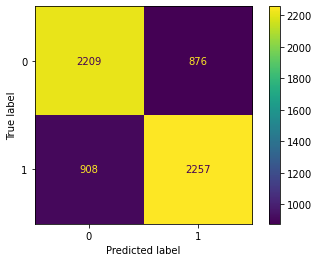

In [42]:
cm = confusion_matrix(y_test, Y_ClasificacionAD)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(Y_ClasificacionAD))
disp.plot()
plt.show()

## Máquina de soporte vectorial

In [43]:
start = time.time()
ModeloSVM_1 = SVC(kernel='linear')
ModeloSVM_1.fit(X_train_bow, y_train)
print("Tiempo de entrenamiento: ",time.time()-start)

Tiempo de entrenamiento:  466.5662717819214


In [44]:
start = time.time()
Clasificaciones_1 = ModeloSVM_1.predict(X_test_bow)
print("Tiempo de predicción: ",time.time()-start)
print(Clasificaciones_1)

#pd.DataFrame(Clasificaciones_1)

Clasificaciones = pd.DataFrame(y_test, Clasificaciones_1)
Clasificaciones

#Se calcula la exactitud promedio de la validación
ModeloSVM_1.score(X_test_bow, y_test)

#### **Validación del modelo**

#Matriz de clasificación
Clasificaciones_1 = ModeloSVM_1.predict(X_test_bow)
Matriz_Clasificacion = pd.crosstab(y_test.ravel(), 
                                   Clasificaciones_1, 
                                   rownames=['Real'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion


#Reporte de la clasificación
print("Exactitud", ModeloSVM_1.score(X_test_bow, y_test))
print(classification_report(y_test, Clasificaciones_1))

VectoresSoporte_1 = ModeloSVM_1.support_vectors_
pd.DataFrame(VectoresSoporte_1)

#Vectores de soporte
print('Número de vectores de soporte: \n', ModeloSVM_1.n_support_)
print('Vectores de soporte: \n', ModeloSVM_1.support_)


Tiempo de predicción:  29.143553018569946
[1 1 0 ... 1 1 1]
Exactitud 0.84912
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      3085
           1       0.84      0.86      0.85      3165

    accuracy                           0.85      6250
   macro avg       0.85      0.85      0.85      6250
weighted avg       0.85      0.85      0.85      6250

Número de vectores de soporte: 
 [3067 3197]
Vectores de soporte: 
 [    1     7    21 ... 18743 18745 18749]


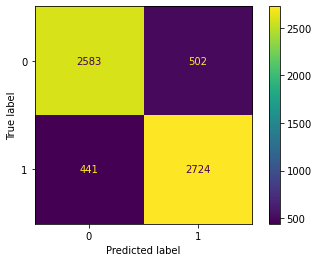

In [45]:
cm = confusion_matrix(y_test, Clasificaciones_1)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(Clasificaciones_1))
disp.plot()
plt.show()

# BOW + lematización + eliminando stopwords

In [46]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()


def lemmatize_words(text):  #funcion obtenida con chatgpt
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    return ' '.join(lemmatized_words)


df_movies['lem_clean_text'] = df_movies['clean_text'].apply(lemmatize_words)

print(df_movies)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rodol\AppData\Roaming\nltk_data...


                                          Informacion  Clasification  \
0   Story of a man who has unnatural feelings for ...              0   
0   Airport '77 starts as a brand new luxury 747 p...              0   
0   This film lacked something I couldn't put my f...              0   
0   Sorry everyone,,, I know this is supposed to b...              0   
0   When I was little my parents took me along to ...              0   
..                                                ...            ...   
0   Seeing as the vote average was pretty low, and...              1   
0   The plot had some wretched, unbelievable twist...              1   
0   I am amazed at how this movie(and most others ...              1   
0   A Christmas Together actually came before my t...              1   
0   Working-class romantic drama from director Mar...              1   

                                           clean_text  \
0   story of a man who has unnatural feelings for ...   
0   airport 77 starts

In [47]:
from sklearn.feature_extraction.text import CountVectorizer #bolsa de palabras y pasamos las stop words. 

X = df_movies['lem_clean_text'].values
y = df_movies['Clasification'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
vector = CountVectorizer(stop_words = 'english') #Stopwords

X_train_bow = vector.fit_transform(X_train)
X_test_bow = vector.transform(X_test)

In [48]:
X_train_bow.shape, X_test_bow.shape

((18750, 93027), (6250, 93027))

## Naives Bayes

In [49]:
start = time.time()
bayes_pred = MultinomialNB()
bayes_pred.fit(X_train_bow, y_train)
print("Tiempo de entrenamiento: ",time.time()-start)


start = time.time()
predictions = bayes_pred.predict(X_test_bow)
print("Tiempo de prediccción: ",time.time()-start)

Tiempo de entrenamiento:  0.03697991371154785
Tiempo de prediccción:  0.007977485656738281


In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      3085
           1       0.87      0.83      0.85      3165

    accuracy                           0.85      6250
   macro avg       0.85      0.85      0.85      6250
weighted avg       0.85      0.85      0.85      6250



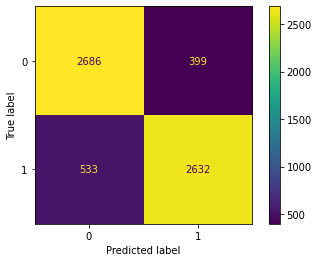

In [51]:
cm = confusion_matrix(y_test, predictions)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

## Árbol de decisión

In [52]:
start = time.time()
ClasificacionAD = DecisionTreeClassifier(criterion='gini',random_state=0)
ClasificacionAD.fit(X_train_bow, y_train)
print("Tiempo de entrenamiento: ", time.time()-start)

Tiempo de entrenamiento:  19.603138208389282


In [53]:
start = time.time()
Y_ClasificacionAD = ClasificacionAD.predict(X_test_bow)
print("Tiempo de predicción: ", time.time()-start)


Tiempo de predicción:  0.010039091110229492


In [54]:
print(Y_ClasificacionAD)
print(classification_report(y_test, Y_ClasificacionAD))

[1 0 0 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      3085
           1       0.73      0.72      0.72      3165

    accuracy                           0.72      6250
   macro avg       0.72      0.72      0.72      6250
weighted avg       0.72      0.72      0.72      6250



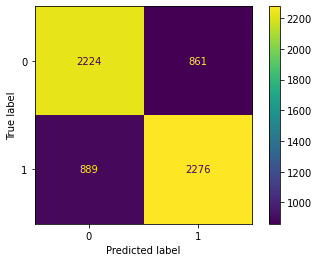

In [55]:
cm = confusion_matrix(y_test, Y_ClasificacionAD)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(Y_ClasificacionAD))
disp.plot()
plt.show()

## Máquina de soporte vectorial

In [56]:
start = time.time()
ModeloSVM_1 = SVC(kernel='linear')
ModeloSVM_1.fit(X_train_bow, y_train)
print("Tiempo de entrenamiento: ",time.time()-start)

Tiempo de entrenamiento:  437.948148727417


In [57]:
start = time.time()
Clasificaciones_1 = ModeloSVM_1.predict(X_test_bow)
print("Tiempo de predicción: ",time.time()-start)
print(Clasificaciones_1)

#pd.DataFrame(Clasificaciones_1)

Clasificaciones = pd.DataFrame(y_test, Clasificaciones_1)
Clasificaciones

#Se calcula la exactitud promedio de la validación
ModeloSVM_1.score(X_test_bow, y_test)

#### **Validación del modelo**

#Matriz de clasificación
Clasificaciones_1 = ModeloSVM_1.predict(X_test_bow)
Matriz_Clasificacion = pd.crosstab(y_test.ravel(), 
                                   Clasificaciones_1, 
                                   rownames=['Real'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion


#Reporte de la clasificación
print("Exactitud", ModeloSVM_1.score(X_test_bow, y_test))
print(classification_report(y_test, Clasificaciones_1))

VectoresSoporte_1 = ModeloSVM_1.support_vectors_
pd.DataFrame(VectoresSoporte_1)

#Vectores de soporte
print('Número de vectores de soporte: \n', ModeloSVM_1.n_support_)
print('Vectores de soporte: \n', ModeloSVM_1.support_)


Tiempo de predicción:  28.229917526245117
[1 1 0 ... 1 1 1]
Exactitud 0.85376
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      3085
           1       0.85      0.86      0.86      3165

    accuracy                           0.85      6250
   macro avg       0.85      0.85      0.85      6250
weighted avg       0.85      0.85      0.85      6250

Número de vectores de soporte: 
 [3246 3328]
Vectores de soporte: 
 [    1    16    21 ... 18738 18743 18749]


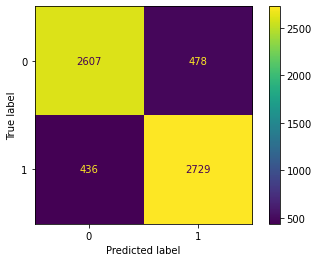

In [58]:
cm = confusion_matrix(y_test, Clasificaciones_1)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(Clasificaciones_1))
disp.plot()
plt.show()

# TF-IDF eliminando stopwords

In [59]:

X = df_movies['clean_text'].values
y = df_movies['Clasification'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 123)

tfidf = TfidfVectorizer(stop_words = 'english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



In [60]:
X_train_tfidf.shape, X_test_tfidf.shape

((18750, 103293), (6250, 103293))

## Naive Bayes

In [61]:
start = time.time()
bayes_pred = MultinomialNB()
bayes_pred.fit(X_train_tfidf, y_train)
print("Tiempo de entrenamiento: ",time.time()-start)


start = time.time()
predictions = bayes_pred.predict(X_test_tfidf)
print("Tiempo de prediccción: ",time.time()-start)

Tiempo de entrenamiento:  0.03299689292907715
Tiempo de prediccción:  0.0039899349212646484


In [62]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      3085
           1       0.88      0.84      0.86      3165

    accuracy                           0.86      6250
   macro avg       0.86      0.86      0.86      6250
weighted avg       0.86      0.86      0.86      6250



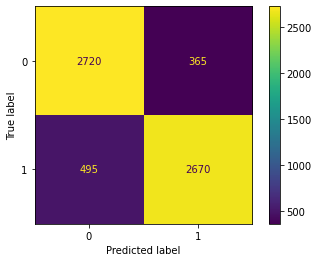

In [63]:
cm = confusion_matrix(y_test, predictions)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

## Árbol de Decisión

In [64]:

start = time.time()
ClasificacionAD = DecisionTreeClassifier(criterion='gini',random_state=0)
ClasificacionAD.fit(X_train_tfidf, y_train)
print("Tiempo de entrenamiento: ", time.time()-start)

Tiempo de entrenamiento:  21.931164503097534


In [65]:
start = time.time()
Y_ClasificacionAD = ClasificacionAD.predict(X_test_tfidf)
print("Tiempo de predicción: ", time.time()-start)


Tiempo de predicción:  0.02159738540649414


In [66]:
print(Y_ClasificacionAD)
print(classification_report(y_test, Y_ClasificacionAD))

[1 0 0 ... 1 0 1]
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      3085
           1       0.72      0.71      0.71      3165

    accuracy                           0.71      6250
   macro avg       0.71      0.71      0.71      6250
weighted avg       0.71      0.71      0.71      6250



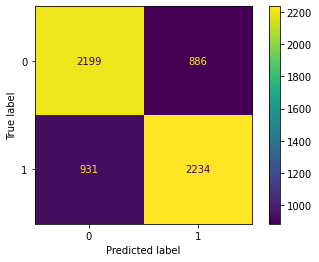

In [67]:
cm = confusion_matrix(y_test, Y_ClasificacionAD)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(Y_ClasificacionAD))
disp.plot()
plt.show()

## Máquina de soporte vectorial

In [68]:
start = time.time()
ModeloSVM_1 = SVC(kernel='linear')
ModeloSVM_1.fit(X_train_bow, y_train)
print("Tiempo de entrenamiento: ",time.time()-start)

Tiempo de entrenamiento:  471.6743643283844


In [69]:
start = time.time()
Clasificaciones_1 = ModeloSVM_1.predict(X_test_bow)
print("Tiempo de predicción: ",time.time()-start)
print(Clasificaciones_1)

#pd.DataFrame(Clasificaciones_1)

Clasificaciones = pd.DataFrame(y_test, Clasificaciones_1)
Clasificaciones

#Se calcula la exactitud promedio de la validación
ModeloSVM_1.score(X_test_bow, y_test)

#### **Validación del modelo**

#Matriz de clasificación
Clasificaciones_1 = ModeloSVM_1.predict(X_test_bow)
Matriz_Clasificacion = pd.crosstab(y_test.ravel(), 
                                   Clasificaciones_1, 
                                   rownames=['Real'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion


#Reporte de la clasificación
print("Exactitud", ModeloSVM_1.score(X_test_bow, y_test))
print(classification_report(y_test, Clasificaciones_1))

VectoresSoporte_1 = ModeloSVM_1.support_vectors_
pd.DataFrame(VectoresSoporte_1)

#Vectores de soporte
print('Número de vectores de soporte: \n', ModeloSVM_1.n_support_)
print('Vectores de soporte: \n', ModeloSVM_1.support_)


Tiempo de predicción:  27.392104148864746
[1 1 0 ... 1 1 1]
Exactitud 0.85376
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      3085
           1       0.85      0.86      0.86      3165

    accuracy                           0.85      6250
   macro avg       0.85      0.85      0.85      6250
weighted avg       0.85      0.85      0.85      6250

Número de vectores de soporte: 
 [3246 3328]
Vectores de soporte: 
 [    1    16    21 ... 18738 18743 18749]


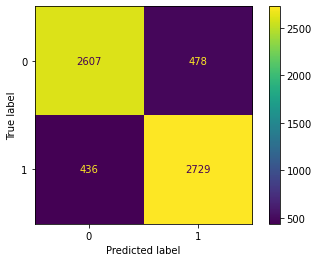

In [70]:
cm = confusion_matrix(y_test, Clasificaciones_1)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(Clasificaciones_1))
disp.plot()
plt.show()

# TF-IDF incluyendo stopwords

In [71]:
X = df_movies['clean_text'].values
y = df_movies['Clasification'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 123)

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [72]:
X_train_tfidf.shape, X_test_tfidf.shape

((18750, 103603), (6250, 103603))

## Naive Bayes

In [73]:
start = time.time()
bayes_pred = MultinomialNB()
bayes_pred.fit(X_train_tfidf, y_train)
print("Tiempo de entrenamiento: ",time.time()-start)


start = time.time()
predictions = bayes_pred.predict(X_test_tfidf)
print("Tiempo de prediccción: ",time.time()-start)

Tiempo de entrenamiento:  0.04102206230163574
Tiempo de prediccción:  0.015957117080688477


In [74]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3085
           1       0.89      0.82      0.85      3165

    accuracy                           0.86      6250
   macro avg       0.86      0.86      0.86      6250
weighted avg       0.86      0.86      0.86      6250



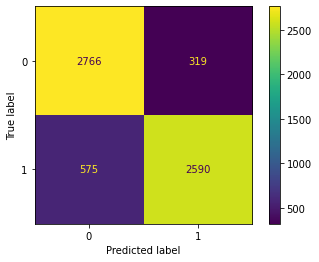

In [75]:
cm = confusion_matrix(y_test, predictions)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

## Árbol de Decisión

In [76]:

start = time.time()
ClasificacionAD = DecisionTreeClassifier(criterion='gini',random_state=0)
ClasificacionAD.fit(X_train_tfidf, y_train)
print("Tiempo de entrenamiento: ", time.time()-start)

Tiempo de entrenamiento:  30.72980308532715


In [77]:
start = time.time()
Y_ClasificacionAD = ClasificacionAD.predict(X_test_tfidf)
print("Tiempo de predicción: ", time.time()-start)


Tiempo de predicción:  0.03865313529968262


In [78]:
print(Y_ClasificacionAD)
print(classification_report(y_test, Y_ClasificacionAD))

[1 0 0 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      3085
           1       0.70      0.71      0.70      3165

    accuracy                           0.70      6250
   macro avg       0.70      0.70      0.70      6250
weighted avg       0.70      0.70      0.70      6250



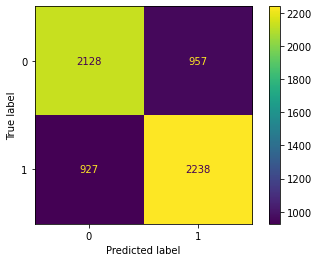

In [79]:
cm = confusion_matrix(y_test, Y_ClasificacionAD)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(Y_ClasificacionAD))
disp.plot()
plt.show()

## Máquina de soporte vectorial

In [80]:
start = time.time()
ModeloSVM_1 = SVC(kernel='linear')
ModeloSVM_1.fit(X_train_bow, y_train)
print("Tiempo de entrenamiento: ",time.time()-start)

Tiempo de entrenamiento:  441.48826146125793


In [81]:
start = time.time()
Clasificaciones_1 = ModeloSVM_1.predict(X_test_bow)
print("Tiempo de predicción: ",time.time()-start)
print(Clasificaciones_1)

#pd.DataFrame(Clasificaciones_1)

Clasificaciones = pd.DataFrame(y_test, Clasificaciones_1)
Clasificaciones

#Se calcula la exactitud promedio de la validación
ModeloSVM_1.score(X_test_bow, y_test)

#### **Validación del modelo**

#Matriz de clasificación
Clasificaciones_1 = ModeloSVM_1.predict(X_test_bow)
Matriz_Clasificacion = pd.crosstab(y_test.ravel(), 
                                   Clasificaciones_1, 
                                   rownames=['Real'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion


#Reporte de la clasificación
print("Exactitud", ModeloSVM_1.score(X_test_bow, y_test))
print(classification_report(y_test, Clasificaciones_1))

VectoresSoporte_1 = ModeloSVM_1.support_vectors_
pd.DataFrame(VectoresSoporte_1)

#Vectores de soporte
print('Número de vectores de soporte: \n', ModeloSVM_1.n_support_)
print('Vectores de soporte: \n', ModeloSVM_1.support_)


Tiempo de predicción:  29.952047109603882
[1 1 0 ... 1 1 1]
Exactitud 0.85376
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      3085
           1       0.85      0.86      0.86      3165

    accuracy                           0.85      6250
   macro avg       0.85      0.85      0.85      6250
weighted avg       0.85      0.85      0.85      6250

Número de vectores de soporte: 
 [3246 3328]
Vectores de soporte: 
 [    1    16    21 ... 18738 18743 18749]


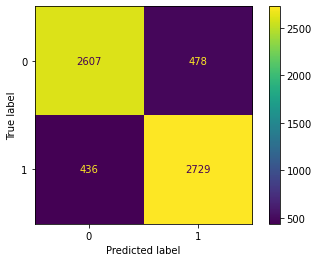

In [82]:
cm = confusion_matrix(y_test, Clasificaciones_1)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(Clasificaciones_1))
disp.plot()
plt.show()

# TF-IDF con stemming y eliminando stopwords

In [83]:
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

ps = PorterStemmer ()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def stem_w(text):  #funcion obtenida de chatGPT
  words = nltk.word_tokenize(text)
  stemmed_words = [ps.stem(word) for word in words]
  filter_words = [word for word in stemmed_words if word not in stop_words]
  return ' '.join(filter_words) 


df_movies['stemmed_clean_text'] = df_movies['clean_text'].apply(stem_w)
        

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rodol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodol\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [84]:

X = df_movies['stemmed_clean_text'].values
y = df_movies['Clasification'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 123)

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



In [85]:
X_train_tfidf.shape, X_test_tfidf.shape

((18750, 78423), (6250, 78423))

## Naive Bayes

In [86]:
start = time.time()
bayes_pred = MultinomialNB()
bayes_pred.fit(X_train_tfidf, y_train)
print("Tiempo de entrenamiento: ",time.time()-start)


start = time.time()
predictions = bayes_pred.predict(X_test_tfidf)
print("Tiempo de prediccción: ",time.time()-start)

Tiempo de entrenamiento:  0.03306436538696289
Tiempo de prediccción:  0.011543750762939453


In [87]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3085
           1       0.88      0.83      0.85      3165

    accuracy                           0.85      6250
   macro avg       0.86      0.86      0.85      6250
weighted avg       0.86      0.85      0.85      6250



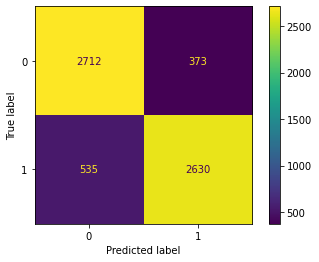

In [88]:
cm = confusion_matrix(y_test, predictions)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

## Árbol de Decisión

In [89]:

start = time.time()
ClasificacionAD = DecisionTreeClassifier(criterion='gini',random_state=0)
ClasificacionAD.fit(X_train_tfidf, y_train)
print("Tiempo de entrenamiento: ", time.time()-start)

Tiempo de entrenamiento:  20.238947868347168


In [90]:
start = time.time()
Y_ClasificacionAD = ClasificacionAD.predict(X_test_tfidf)
print("Tiempo de predicción: ", time.time()-start)


Tiempo de predicción:  0.03861260414123535


In [91]:
print(Y_ClasificacionAD)
print(classification_report(y_test, Y_ClasificacionAD))

[0 0 0 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      3085
           1       0.71      0.71      0.71      3165

    accuracy                           0.71      6250
   macro avg       0.71      0.71      0.71      6250
weighted avg       0.71      0.71      0.71      6250



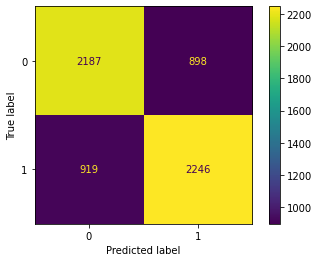

In [92]:
cm = confusion_matrix(y_test, Y_ClasificacionAD)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(Y_ClasificacionAD))
disp.plot()
plt.show()

## Máquina de soporte vectorial

In [93]:
start = time.time()
ModeloSVM_1 = SVC(kernel='linear')
ModeloSVM_1.fit(X_train_bow, y_train)
print("Tiempo de entrenamiento: ",time.time()-start)

Tiempo de entrenamiento:  476.73202443122864


In [94]:
start = time.time()
Clasificaciones_1 = ModeloSVM_1.predict(X_test_bow)
print("Tiempo de predicción: ",time.time()-start)
print(Clasificaciones_1)

#pd.DataFrame(Clasificaciones_1)

Clasificaciones = pd.DataFrame(y_test, Clasificaciones_1)
Clasificaciones

#Se calcula la exactitud promedio de la validación
ModeloSVM_1.score(X_test_bow, y_test)

#### **Validación del modelo**

#Matriz de clasificación
Clasificaciones_1 = ModeloSVM_1.predict(X_test_bow)
Matriz_Clasificacion = pd.crosstab(y_test.ravel(), 
                                   Clasificaciones_1, 
                                   rownames=['Real'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion


#Reporte de la clasificación
print("Exactitud", ModeloSVM_1.score(X_test_bow, y_test))
print(classification_report(y_test, Clasificaciones_1))

VectoresSoporte_1 = ModeloSVM_1.support_vectors_
pd.DataFrame(VectoresSoporte_1)

#Vectores de soporte
print('Número de vectores de soporte: \n', ModeloSVM_1.n_support_)
print('Vectores de soporte: \n', ModeloSVM_1.support_)


Tiempo de predicción:  29.30741596221924
[1 1 0 ... 1 1 1]
Exactitud 0.85376
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      3085
           1       0.85      0.86      0.86      3165

    accuracy                           0.85      6250
   macro avg       0.85      0.85      0.85      6250
weighted avg       0.85      0.85      0.85      6250

Número de vectores de soporte: 
 [3246 3328]
Vectores de soporte: 
 [    1    16    21 ... 18738 18743 18749]


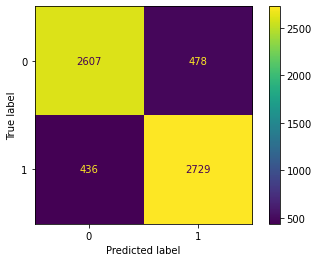

In [95]:
cm = confusion_matrix(y_test, Clasificaciones_1)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(Clasificaciones_1))
disp.plot()
plt.show()

# TF-IDF con lematización y eliminando stopwords

In [96]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer()

# tfidf_matrix = vectorizer.fit_transform(df_movies['stemmed_clean_text'])

# print(tfidf_matrix)

# tfidf_df = pd.DataFrame(tfidf_matrix.toarray())

# print(tfidf_df)
# print(vectorizer.vocabulary_)
# print(vectorizer.idf_)

In [97]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def lemmatize_words(text):  #funcion obtenida con chatgpt
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    filter_words = [word for word in lemmatized_words if word not in stop_words]
    return ' '.join(filter_words)


df_movies['lem_clean_text'] = df_movies['clean_text'].apply(lemmatize_words)

print(df_movies)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rodol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                          Informacion  Clasification  \
0   Story of a man who has unnatural feelings for ...              0   
0   Airport '77 starts as a brand new luxury 747 p...              0   
0   This film lacked something I couldn't put my f...              0   
0   Sorry everyone,,, I know this is supposed to b...              0   
0   When I was little my parents took me along to ...              0   
..                                                ...            ...   
0   Seeing as the vote average was pretty low, and...              1   
0   The plot had some wretched, unbelievable twist...              1   
0   I am amazed at how this movie(and most others ...              1   
0   A Christmas Together actually came before my t...              1   
0   Working-class romantic drama from director Mar...              1   

                                           clean_text  \
0   story of a man who has unnatural feelings for ...   
0   airport 77 starts

In [98]:

X = df_movies['lem_clean_text'].values
y = df_movies['Clasification'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 123)

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



In [99]:
X_train_tfidf.shape, X_test_tfidf.shape

((18750, 93260), (6250, 93260))

## Naive Bayes

In [100]:
start = time.time()
bayes_pred = MultinomialNB()
bayes_pred.fit(X_train_tfidf, y_train)
print("Tiempo de entrenamiento: ",time.time()-start)


start = time.time()
predictions = bayes_pred.predict(X_test_tfidf)
print("Tiempo de prediccción: ",time.time()-start)

Tiempo de entrenamiento:  0.046675920486450195
Tiempo de prediccción:  0.00798177719116211


In [101]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3085
           1       0.88      0.83      0.86      3165

    accuracy                           0.86      6250
   macro avg       0.86      0.86      0.86      6250
weighted avg       0.86      0.86      0.86      6250



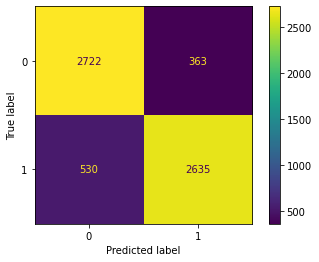

In [102]:
cm = confusion_matrix(y_test, predictions)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

## Árbol de Decisión

In [103]:

start = time.time()
ClasificacionAD = DecisionTreeClassifier(criterion='gini',random_state=0)
ClasificacionAD.fit(X_train_tfidf, y_train)
print("Tiempo de entrenamiento: ", time.time()-start)

Tiempo de entrenamiento:  25.697856187820435


In [104]:
start = time.time()
Y_ClasificacionAD = ClasificacionAD.predict(X_test_tfidf)
print("Tiempo de predicción: ", time.time()-start)


Tiempo de predicción:  0.040734052658081055


In [105]:
print(Y_ClasificacionAD)
print(classification_report(y_test, Y_ClasificacionAD))

[0 1 0 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      3085
           1       0.72      0.71      0.71      3165

    accuracy                           0.71      6250
   macro avg       0.71      0.71      0.71      6250
weighted avg       0.71      0.71      0.71      6250



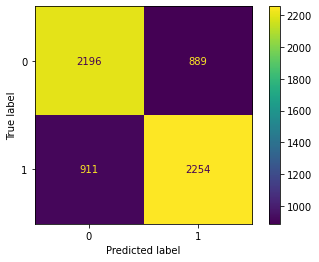

In [106]:
cm = confusion_matrix(y_test, Y_ClasificacionAD)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(Y_ClasificacionAD))
disp.plot()
plt.show()

## Máquina de soporte vectorial

In [107]:
start = time.time()
ModeloSVM_1 = SVC(kernel='linear')
ModeloSVM_1.fit(X_train_bow, y_train)
print("Tiempo de entrenamiento: ",time.time()-start)

Tiempo de entrenamiento:  514.4490685462952


In [108]:
start = time.time()
Clasificaciones_1 = ModeloSVM_1.predict(X_test_bow)
print("Tiempo de predicción: ",time.time()-start)
print(Clasificaciones_1)

#pd.DataFrame(Clasificaciones_1)

Clasificaciones = pd.DataFrame(y_test, Clasificaciones_1)
Clasificaciones

#Se calcula la exactitud promedio de la validación
ModeloSVM_1.score(X_test_bow, y_test)

#### **Validación del modelo**

#Matriz de clasificación
Clasificaciones_1 = ModeloSVM_1.predict(X_test_bow)
Matriz_Clasificacion = pd.crosstab(y_test.ravel(), 
                                   Clasificaciones_1, 
                                   rownames=['Real'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion


#Reporte de la clasificación
print("Exactitud", ModeloSVM_1.score(X_test_bow, y_test))
print(classification_report(y_test, Clasificaciones_1))

VectoresSoporte_1 = ModeloSVM_1.support_vectors_
pd.DataFrame(VectoresSoporte_1)

#Vectores de soporte
print('Número de vectores de soporte: \n', ModeloSVM_1.n_support_)
print('Vectores de soporte: \n', ModeloSVM_1.support_)


Tiempo de predicción:  31.28772735595703
[1 1 0 ... 1 1 1]
Exactitud 0.85376
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      3085
           1       0.85      0.86      0.86      3165

    accuracy                           0.85      6250
   macro avg       0.85      0.85      0.85      6250
weighted avg       0.85      0.85      0.85      6250

Número de vectores de soporte: 
 [3246 3328]
Vectores de soporte: 
 [    1    16    21 ... 18738 18743 18749]


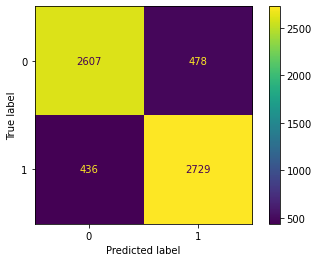

In [109]:
cm = confusion_matrix(y_test, Clasificaciones_1)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(Clasificaciones_1))
disp.plot()
plt.show()

# Tabla de Resultados

In [122]:
ResultadosNB = {"Tipo de modelo Naive Bayes:" : ["BOW - Sin stopwords", "BOW - Con Stopwords","BOW - Stemming S/StW", "BOW - Lematización S/StW", "TF-IDF - Con Stopwords", "TF-IDF - Sin stopwords","TF-IDF - Stemming S/StW", "TF-IDF - Lematización S/StW"],
              "Train Time: " : ["0.066", "0.034", "0.031", "0.036", "0.032", "0.041", "0.033", "0.046"],
              "Predict Time: " : ["0.022", "0.009", "0.006", "0.007", "0.003", "0.015", "0.011", "0.007"],
              "Precision: " : ["85%", "85%", "85%", "85%", "86%", "86%", "86%", "86%"]}
dfResultadosNB = pd.DataFrame(ResultadosNB)
print(dfResultadosNB)

ResultadosArbol = {"Tipo de modelo Árbol:" : ["BOW - Sin stopwords", "BOW - Con Stopwords","BOW - Stemming S/StW", "BOW - Lematización S/StW", "TF-IDF - Con Stopwords", "TF-IDF - Sin stopwords","TF-IDF - Stemming S/StW", "TF-IDF - Lematización S/StW"],
              "Train Time: " : ["90.390", "29.573", "15.702", "19.603", "21.931", "30.729", "20.238", "25.697"],
              "Predict Time: " : ["0.029", "0.018", "0.018", "0.010", "0.021", "0.038", "0.038", "0.040"],
              "Precision: " : ["72%", "71%", "71%", "72%", "71%", "70%", "71%", "71%"]}
dfResultadosArbol = pd.DataFrame(ResultadosArbol)
print(dfResultadosArbol)

ResultadosSVM = {"Tipo de modelo SVM:" : ["BOW - Sin stopwords", "BOW - Con Stopwords","BOW - Stemming S/StW", "BOW - Lematización S/StW", "TF-IDF - Con Stopwords", "TF-IDF - Sin stopwords","TF-IDF - Stemming S/StW", "TF-IDF - Lematización S/StW"],
              "Train Time: " : ["761.632", "894.791", "466.566", "437.948", "471.674", "441.488", "476.732", "514.449"],
              "Predict Time: " : ["32.550", "58.589", "29.143", "28.229", "27.392", "29.952", "29.307", "31.287"],
              "Precision: " : ["86%", "86%", "85%", "85%", "85%", "85%", "85%", "85%"]}
dfResultadosSVM = pd.DataFrame(ResultadosSVM)
print(dfResultadosSVM)

   Tipo de modelo Naive Bayes: Train Time:  Predict Time:  Precision: 
0          BOW - Sin stopwords        0.066          0.022         85%
1          BOW - Con Stopwords        0.034          0.009         85%
2         BOW - Stemming S/StW        0.031          0.006         85%
3     BOW - Lematización S/StW        0.036          0.007         85%
4       TF-IDF - Con Stopwords        0.032          0.003         86%
5       TF-IDF - Sin stopwords        0.041          0.015         86%
6      TF-IDF - Stemming S/StW        0.033          0.011         86%
7  TF-IDF - Lematización S/StW        0.046          0.007         86%
         Tipo de modelo Árbol: Train Time:  Predict Time:  Precision: 
0          BOW - Sin stopwords       90.390          0.029         72%
1          BOW - Con Stopwords       29.573          0.018         71%
2         BOW - Stemming S/StW       15.702          0.018         71%
3     BOW - Lematización S/StW       19.603          0.010         72%
4     

# Conclusiones

### Basile Álvarez Andrés:

Durante la realización de este ejercicio, trabajamos con representaciones vectoriales "BOW" y "TF-IDF", aplicando varios algoritmos de clasificación para, a partir de un conjunto de datos de reseñas de películas, obtener su respectiva clasificación dentro de las categorías: "positiva" o "negativa".

Con tal objetivo en mente, realizamos distintas variaciones en la aplicación de los algoritmos: incluyendo "stopwords", eliminando "stopwords", realizando "stemming" y eliminando "stopwords y realizando "lematización" y eliminando "stopwords". A partir de estos modelos, observamos que los que tuvieron mayor precisión fueron los que utilizaron el algoritmo de Naive Bayes y la Máquina de Soporte Vectorial, puntuando en alrededor de 85% de precisión. No obstante, el gran aumento de tiempo necesario para entrenar y predecir nuevas clasificaciones utilizando la máquina de soporte vectorial, comparado con el algoritmo de Naive Bayes, hace que éste último sea mucho más adecuado para esta aplicación.

Para futuras pruebas sería recomendable analizar la psoibilidad de trabajar con el conjunto de datos completo, sin embargo, al tener tantos problemas para la realización del ejercicio debido al excesivo tiempo de entrenamiento y ejecución, se decidió únicamente utilizar el conjunto de prueba donde se dividió este conjunto en dos subconjuntos, uno para entrenamiento conteniendo el 75% de los datos y otro de prueba conteniendo el 25 % de los datos.



### Keller Ascencio Rodolfo Andrés:

A lo largo de este ejercicio se estuvo trabajando con diferentes técnicas de representación vectorial, tanto Bag Of Words (bolsa de palabras), como TF-IDF, así como con tres algoritmos de aprendizaje máquina, siendo estos el Naive Bayes, Árboles de Decisión y la Máquina de Soporte Vectorial (SVM). De misma manera, se trabajó con dos conjuntos de datos, uno de entrenamiento y otro de prueba, donde estos datos hacían referencia a la reseña de películas, de tal forma que se pueda realizar una clasificación con respecto a si una reseña es positiva o negativa, a partir de las palabras contenidas dentro de la misma.

Para esto, se realizaron ocho diferentes pruebas con cada uno de los tres diferentes algoritmos de aprendizaje máquina, donde se trabajó con BOW y TF-IDF, analizando la diferencia entre estos dos, así como la diferencia del uso de procedimientos como lo es la eliminación de stopwords, el uso de stemming y el uso de lematización, teniendo como resultado 24 distintos modelos a analizar.

Como conclusión, a partir de la tabla de resultados obtenida se aprecia cómo los algoritmos de Naive Bayes y SVM fueron los más precisos, siendo el Naive Bayes TF-IDF el que obtuvo una mayor precisión al momento de realizar la clasificación de las reseñas, teniendo un 86% de precisión. El uso del algoritmo de árboles de decisión resultó ser el menos preciso con un 71% promedio. 

Por otro lado, con respecto a los tiempos de entrenamiento y predicción la SVM resultó ser el algoritmo de mayor tiempo, con un tiempo promedio de entrenamiento de nueve minutos veinte segundos y un tiempo de predicción promedio de treinta y dos segundos, siendo sumamente mayor con respecto al Naive Bayes y a los Árboles de deisión. Al hacer uso de Naive Bayes se tuvo un tiempo de entrenamiento promedio de menos de 0.05 segundos y un tiempo de predicción promedio menor a 0.01 segundos.

A partir de estos resultados podemos concluir que el mejor tipo de algoritmo y procedimiento para la clasificación de reseñas positivas y negativas de películas sería el Naive Bayes TF-IDF, donde no hubo mucha diferencia con respecto al uso de stopwords, o el procedimiento de stemming o lematización, por lo cual deberíamos realizar un estudio más profundo con respecto a las implicaciones que traería el uso de estos procedimientos para la clasificación de las reseñas y de esta manera, seleccionar el modelo que mejor se ajuste a nuestras necesidades. 

A manera de observación, en el futuro recomendaría realizar la selección de otro algoritmo de aprendizaje de máquina distinto a la Máquina de Soporte Vectorial para que, de esta manera, podamos hacer uso del conjunto completo de datos de entrenamiento y prueba, puesto que al tener tantos problemas en un inicio para la ejecución del código se tomó la decisión de trabajar únicamente con la mitad de los datos, haciendo uso del conjunto de entrenamiento original y dividiendo este conjunto de entrenamiento en dos subconjuntos, donde un 75% de datos se usó para el entrenamiento y un 25% de datos para la prueba, resultando que aún así los tiempos de ejecución fueron excesivos para la realización de la práctica, sin embargo, ya contábamos con un mismo parámetro de comparación para todos los modelos.
